<a href="https://colab.research.google.com/github/StephanieApaza/will_customers_purchase_your_product/blob/main/Will_customers_purchase_your_products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [36]:
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


In [37]:
shopping_data.shape

(12055, 15)

In [38]:
shopping_data.isna().sum()

,0
SessionID,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0


In [39]:
shopping_data.describe()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Purchase
count,12055.000000,12055.000000,12055.000000,12055.000000,12055.000000,12055.000000,12055.000000,12055.000000,12055.000000,12055.000000,12055.000000,12054.000000
mean,6028.000000,2.320614,80.735481,0.505268,34.648971,31.688096,1191.743969,0.022125,0.042977,5.793676,0.062829,0.154223
std,3480.123082,3.320123,175.766025,1.270637,141.574000,44.371672,1912.521630,0.048277,0.048468,18.074742,0.200955,0.361177
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3014.500000,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,0.000000
50%,6028.000000,1.000000,8.000000,0.000000,0.000000,18.000000,599.333333,0.003139,0.025068,0.000000,0.000000,0.000000
75%,9041.500000,4.000000,93.500000,0.000000,0.000000,38.000000,1464.104809,0.016947,0.050000,0.000000,0.000000,0.000000
max,12055.000000,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,1.000000


In [40]:
shopping_data.dtypes

,0
SessionID,int64
Administrative,int64
Administrative_Duration,float64
Informational,int64
Informational_Duration,float64
ProductRelated,int64
ProductRelated_Duration,float64
BounceRates,float64
ExitRates,float64
PageValues,float64


# **Validation**

**Numeric columns**

In [41]:
# Numeric columns
numeric = shopping_data.select_dtypes(include=['number'])

for col in numeric.columns:
    try:
        # Convert to numeric
        pd.to_numeric(numeric[col], errors='raise')
    except Exception:
        # If failed, show the problematic rows
        error = pd.to_numeric(numeric[col], errors='coerce').isna() & numeric[col].notna()
        if error.any():
            print(f"Columna '{col}' tiene valores no numéricos en filas:", numeric.index[error].tolist())

In [42]:
numeric = shopping_data.select_dtypes(include=['number'])
for col in numeric.columns:
  print(f"Number of unique values in {col} column:", numeric[col].nunique())

Number of unique values in SessionID column: 12055
Number of unique values in Administrative column: 26
Number of unique values in Administrative_Duration column: 3285
Number of unique values in Informational column: 17
Number of unique values in Informational_Duration column: 1240
Number of unique values in ProductRelated column: 306
Number of unique values in ProductRelated_Duration column: 9376
Number of unique values in BounceRates column: 1841
Number of unique values in ExitRates column: 4694
Number of unique values in PageValues column: 2641
Number of unique values in SpecialDay column: 6
Number of unique values in Purchase column: 2


In [43]:
shopping_data['Purchase'].unique()

array([ 0.,  1., nan])

**Object columns**

In [44]:
# Unique values in no numeric columns
non_numeric = shopping_data.select_dtypes('object')
for col in non_numeric.columns:
  print(f"Number of unique values in {col} column:", non_numeric[col].nunique())

Number of unique values in Month column: 11
Number of unique values in CustomerType column: 2


In [45]:
shopping_data['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec', 'N'], dtype=object)

In [46]:
shopping_data['Month'].value_counts()

,count
Month,
May,3364
Nov,2861
Mar,1907
Dec,1589
Oct,549
Sep,448
Aug,433
Jul,432
June,287


In [47]:
shopping_data['CustomerType'].unique()

array(['Returning_Customer', 'New_Customer', nan], dtype=object)

In [48]:
shopping_data['CustomerType'].value_counts()

,count
CustomerType,
Returning_Customer,10386
New_Customer,1668


**Duplicates values**

In [49]:
# If there are duplicates
shopping_data.duplicated().sum()

np.int64(0)

In [50]:
shopping_data.duplicated(subset=['SessionID']).sum()

np.int64(0)

**Missing values**

In [51]:
missing_customertype_purchase = shopping_data[shopping_data['CustomerType'].isna()]
missing_customertype_purchase

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
12054,12055,1,14.5,0,0.0,24,1277.842857,0.0,0.016074,0.0,0.0,True,N,NaN,NaN


In [52]:
# Dropping NaN values
shopping_data = shopping_data.dropna()

In [53]:
# Replacing June by Jun
shopping_data['Month'] = shopping_data['Month'].str.replace("June","Jun")

In [54]:
shopping_data.shape

(12054, 15)

Before cleaning and validation, the dataset contained 12055 rows and 15 columns. I validated all columns against the criteria in the dataset description.

- SessionID: 12055 numeric unique values consistent with the description. No cleaning was needed.
- Administrative: 26 numeric different values. No cleaning was needed.
- Administrative_duration: 3285 numeric different values. No cleaning was needed.
- Informational: 17 numeric different values. No cleaning was needed.
- Informational_Duration: 1240 numeric different values. No cleaning was needed.
- ProductRelated: 306 numeric different values. No cleaning was needed.
- ProductRelated_Duration: 9376 numeric different values. No cleaning was needed.
- BounceRates: 1841 numeric different values. No cleaning was needed.
- ExitRates: 4694 numeric different values. No cleaning was needed.
PageValues: 2641 numeric different values. No cleaning was needed.
- SpecialDay: 6 numeric different values. No cleaning was needed.
- Weekday: 2 different boolean values. No cleaning was needed.
- Month: 11 different object values, cleaning was needed to replace June to Jun and one value "N" was drop with null values in CustomerType and Purchase due to one row with missing value is less than 5% of total dataframe.
- CustomerType: 2 different object values with one null value. It was drop.
- Purchase: 2 different numeric values with one null value. It was drop.

After validation, the **dataset contains 12054 rows and 15 columns** with no missing values.

# **Analysis**

**What are the purchase rates for online shopping sessions by customer type for November and December?**

In [55]:
nov_dec_shopping = shopping_data[shopping_data['Month'].isin(['Nov','Dec'])]
nov_dec_shopping.head(10)

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
5463,5464,1,39.200000,2,120.800000,7,80.500000,0.000000,0.010000,0.000000,0.0,True,Nov,New_Customer,0.0
5464,5465,3,89.600000,0,0.000000,57,1721.906667,0.000000,0.005932,204.007949,0.0,True,Nov,Returning_Customer,1.0
5467,5468,4,204.200000,0,0.000000,31,652.376667,0.012121,0.016162,0.000000,0.0,False,Nov,Returning_Customer,0.0
5479,5480,0,0.000000,0,0.000000,13,710.066667,0.000000,0.007692,72.522838,0.0,False,Nov,Returning_Customer,1.0
5494,5495,0,0.000000,0,0.000000,24,968.692424,0.000000,0.000000,106.252517,0.0,False,Nov,Returning_Customer,1.0
5497,5498,13,1013.056909,2,102.800000,77,2697.022104,0.000000,0.009471,1.798670,0.0,False,Nov,Returning_Customer,0.0
5507,5508,1,86.600000,0,0.000000,14,349.576190,0.000000,0.004762,60.437378,0.0,False,Nov,New_Customer,1.0
5509,5510,6,545.650000,3,204.346667,69,1182.432333,0.000685,0.002998,19.715295,0.0,True,Nov,Returning_Customer,1.0
5510,5511,3,94.600000,0,0.000000,16,1254.000000,0.000000,0.019328,0.000000,0.0,True,Nov,New_Customer,0.0
5515,5516,6,82.140000,0,0.000000,12,191.100000,0.000000,0.012500,0.000000,0.0,False,Nov,Returning_Customer,0.0


In [56]:
num_shopping_session = nov_dec_shopping.groupby(['CustomerType'])['Purchase'].value_counts()
num_shopping_session

CustomerType        Purchase
New_Customer        0.0          529
                    1.0          199
Returning_Customer  0.0         2994
                    1.0          728
Name: count, dtype: int64

In [57]:
# Total customer type
total_new_customer = np.sum(num_shopping_session['New_Customer'])
total_returning_customer = np.sum(num_shopping_session['Returning_Customer'])

In [58]:
# Total customer type that purchased
new_customer_purchase = num_shopping_session[('New_Customer', 1)]
returning_customer_purchase = num_shopping_session[('Returning_Customer', 1)]

In [59]:
# Rates
rate_new_customer_purchase = round(new_customer_purchase/total_new_customer,3)
rate_returning_customer_purchase = round(returning_customer_purchase/total_returning_customer,3)

In [60]:
purchase_rates = {"Returning_Customer": rate_returning_customer_purchase, "New_Customer": rate_new_customer_purchase}
purchase_rates

{'Returning_Customer': np.float64(0.196), 'New_Customer': np.float64(0.273)}

The purchases rates are:
- Returning customers: 19.6%
- New customers: 27.3%

**What is the strongest correlation in total time spent among page types by returning customers in November and December?**

In [61]:
# Only Returning Customer in November and December
customers_nov_dec_shopping = nov_dec_shopping[nov_dec_shopping['CustomerType'] == 'Returning_Customer']

In [62]:
# Correlation between Administrative_Duration and Informational_Duration
corr_admin_infor = round(customers_nov_dec_shopping['Administrative_Duration']\
                         .corr(customers_nov_dec_shopping['Informational_Duration']),3)
corr_admin_infor

np.float64(0.258)

In [63]:
# Correlation between Administrative_Duration and 'ProductRelated_Duration
corr_admin_prod = round(customers_nov_dec_shopping['Administrative_Duration']\
                        .corr(customers_nov_dec_shopping['ProductRelated_Duration']),3)
corr_admin_prod

np.float64(0.417)

In [64]:
# Correlation between Informational_Duration and 'ProductRelated_Duration
corr_infor_prod = round(customers_nov_dec_shopping['Informational_Duration']\
                        .corr(customers_nov_dec_shopping['ProductRelated_Duration']),3)
corr_infor_prod

np.float64(0.367)

In [65]:
top_correlation = {"pair":('Administrative_Duration', 'ProductRelated_Duration'), "correlation":corr_admin_prod}
top_correlation

{'pair': ('Administrative_Duration', 'ProductRelated_Duration'),
 'correlation': np.float64(0.417)}

The strongest correlation in total time spent among page types is between:
*Administrative Duration and Product Related Duration.*

**What is the likelihood of achieving at least 100 sales out of 500 online shopping sessions for the returning customers?**

In [66]:
# Current rate purchase of returning customer
rate_returning_customer_purchase

np.float64(0.196)

In [67]:
# Increase in 15% in the current rate purchase
new_rate_objetive = rate_returning_customer_purchase * 0.15 + rate_returning_customer_purchase
new_rate_objetive * 100

np.float64(22.540000000000003)

In [68]:
# Likelihood of having at leat 100 sales of 500 sessions
prob_at_least_100_sales = 1 - stats.binom.cdf(100, 500, new_rate_objetive)
prob_at_least_100_sales * 100

np.float64(90.54494133589968)

Implementing a campaign that increases the rate by 15%, returning customers would have a 90% chance of achieving al least 100 sales in 500 sessions.

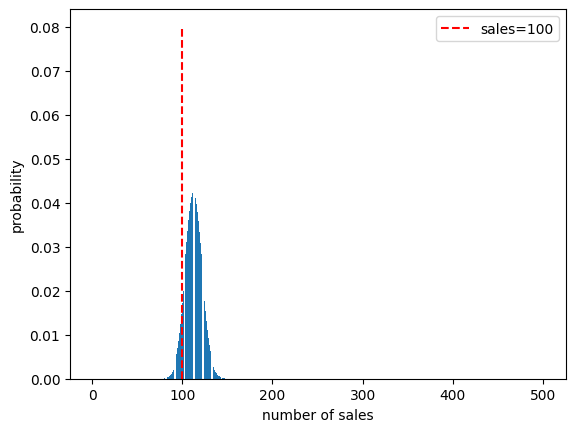

In [109]:
# Plotting the binomial probability distribution
n_sessions = 500
k_values = np.arange(500) + 1
p_binom_values = [stats.binom.pmf(k, n_sessions, new_rate_objetive) for k in k_values ]
plt.bar(k_values, p_binom_values)
plt.vlines(100, 0, 0.08, color='r', linestyle='dashed', label="sales=100")
plt.xlabel("number of sales")
plt.ylabel("probability")
plt.legend()
plt.show()

**Number of sessions by month and Purchase --> 1: Make, 0: Do not make**

In [77]:
session_month_purchase = nov_dec_shopping.pivot_table(values = 'SessionID', index = 'Month', columns = 'Purchase', aggfunc='count', margins=True)
session_month_purchase

Purchase,0.0,1.0,All
Month,,,
Dec,1398,191,1589
Nov,2125,736,2861
All,3523,927,4450


**Number of sessions by Customer Type and Purchase --> 1: Make, 0: Do not make**

In [78]:
session_customer_purchase = nov_dec_shopping.pivot_table(values = 'SessionID', index = 'CustomerType', columns = 'Purchase', aggfunc='count', margins=True)
session_customer_purchase

Purchase,0.0,1.0,All
CustomerType,,,
New_Customer,529,199,728
Returning_Customer,2994,728,3722
All,3523,927,4450


**Rate of purchases made and not by customers and months**

In [106]:
# Rate of doing and do not make purchase by month
count_month_customer = nov_dec_shopping.pivot_table(values = 'SessionID', index = 'Month', columns = ['CustomerType', 'Purchase'], aggfunc=[
    'count'])
rate_month_customer = round(count_month_customer.div(count_month_customer.sum(axis = 1), axis = 0),2)
rate_month_customer

count                               
CustomerType New_Customer       Returning_Customer      
Purchase              0.0   1.0                0.0   1.0
Month                                                   
Dec                  0.16  0.05               0.72  0.07
Nov                  0.10  0.04               0.64  0.21

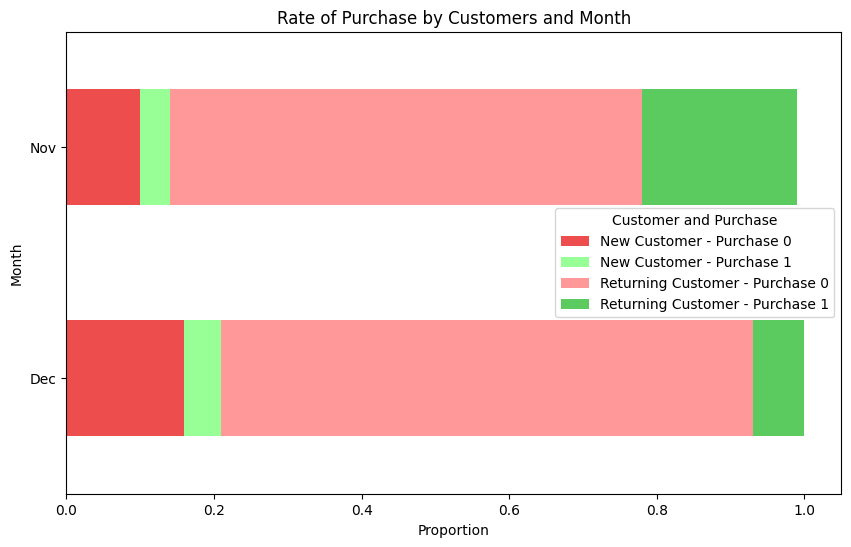

In [123]:
custom_colors = {('Returning_Customer', 0.0):'#ff9999', ('Returning_Customer', 1.0):'#5ccb5f', ('New_Customer', 0.0):'#ed4d4d', ('New_Customer', 1.0):'#98ff96'}

# Extract the last two levels of columns to assign colors col[1] and col[2]
colors = [custom_colors[(col[1], col[2])] for col in rate_month_customer.columns]
# Graph
rate_month_customer.plot(kind='barh', stacked=True, figsize=(10,6), color = colors)
plt.title("Rate of Purchase by Customers and Month")
plt.xlabel("Proportion")
plt.ylabel("Month")
# Legend
labels = [f"{col[1].replace('_', ' ')} - Purchase {int(col[2])}" for col in rate_month_customer.columns]
plt.legend(labels = labels, title="Customer and Purchase")
plt.show()